In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Contents

- Ingest data
- Univariate Analysis
    - df.describe()
    - Count plot for target variable
    - Check distributions of a few variables
- Bivariate Analysis
    - Pairplot
    - Heatmaps
    - T-test on target variable
    - Chi-test
    - Box-plots
    - F stat

### Ingest Data

In [2]:
df = pd.read_csv('flights_clean.csv')
df.head()

C:\Users\James\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,weekend,holiday,long_flight
0,4,AS,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.0,21.0,...,-22.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,0,1,1
1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.0,12.0,...,-9.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,0,1,1
2,4,US,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.0,16.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,0,1,1
3,4,AA,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.0,15.0,...,-9.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,0,1,1
4,4,AS,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.0,11.0,...,-21.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726566 entries, 0 to 5726565
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DAY_OF_WEEK          int64  
 1   AIRLINE              object 
 2   FLIGHT_NUMBER        int64  
 3   TAIL_NUMBER          object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   SCHEDULED_DEPARTURE  object 
 7   DEPARTURE_TIME       object 
 8   DEPARTURE_DELAY      float64
 9   TAXI_OUT             float64
 10  WHEELS_OFF           object 
 11  SCHEDULED_TIME       float64
 12  ELAPSED_TIME         float64
 13  AIR_TIME             float64
 14  DISTANCE             int64  
 15  WHEELS_ON            object 
 16  TAXI_IN              float64
 17  SCHEDULED_ARRIVAL    object 
 18  ARRIVAL_TIME         object 
 19  ARRIVAL_DELAY        float64
 20  AIR_SYSTEM_DELAY     float64
 21  SECURITY_DELAY       float64
 22  AIRLINE_DELAY        float64
 23  LATE_AIRCRAFT_DELAY  float64
 24

In [4]:
df.describe()

,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,weekend,holiday,long_flight
count,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.714008e+06,5.714008e+06,5.726566e+06,5.726566e+06,5.714008e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06,5.726566e+06
mean,3.932544e+00,2.164559e+03,9.317259e+00,1.607021e+01,1.419496e+02,1.370062e+02,1.135116e+02,8.248726e+02,7.434971e+00,4.407057e+00,2.503378e+00,1.414198e-02,3.522697e+00,4.358970e+00,5.413773e-01,2.611789e-01,2.535761e-02,1.562111e-01
std,1.986050e+00,1.754782e+03,3.693294e+01,8.891484e+00,7.533757e+01,7.421107e+01,7.223082e+01,6.088196e+02,5.638548e+00,3.927130e+01,1.315710e+01,9.241604e-01,2.202635e+01,2.073245e+01,8.878060e+00,4.392772e-01,1.572088e-01,3.630554e-01
min,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.800000e+01,1.400000e+01,7.000000e+00,3.100000e+01,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,7.280000e+02,-5.000000e+00,1.100000e+01,8.600000e+01,8.200000e+01,6.000000e+01,3.730000e+02,4.000000e+00,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.681000e+03,-2.000000e+00,1.400000e+01,1.230000e+02,1.180000e+02,9.400000e+01,6.500000e+02,6.000000e+00,-5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,3.211000e+03,7.000000e+00,1.900000e+01,1.740000e+02,1.680000e+02,1.440000e+02,1.066000e+03,9.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,7.000000e+00,9.320000e+03,1.988000e+03,2.250000e+02,7.180000e+02,7.660000e+02,6.900000e+02,4.983000e+03,2.480000e+02,1.971000e+03,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Univariate Analysis

In [5]:
sns.set_style('whitegrid')

In [6]:
ax = sns.countplot(df['DELAYED'])
ax.set_title('Delayed Distribution')

KeyError: 'DELAYED'

In [ ]:
ax = sns.countplot(df['AIRLINE'])
ax.set_title('Airline Distribution')

In [ ]:
ax = sns.countplot(df['DAY_OF_WEEK'])
ax.set_title('Weekday Distribution')

### Bivariate Analysis

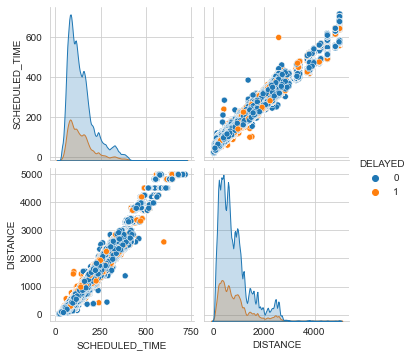

In [11]:
sns.pairplot(df[['DELAYED','DEPARTURE_TIME','SCHEDULED_TIME','DISTANCE']],hue='DELAYED')

<AxesSubplot:>

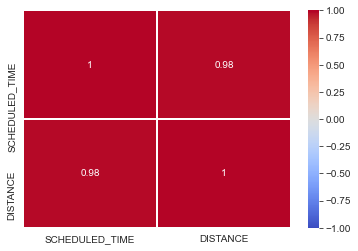

In [12]:
corr = df[['SCHEDULED_TIME','DISTANCE']].corr()

sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1,lw=1)

### Correlation of 0.98 so these values are very correlated

C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transformed SCHEDULED_TIME')

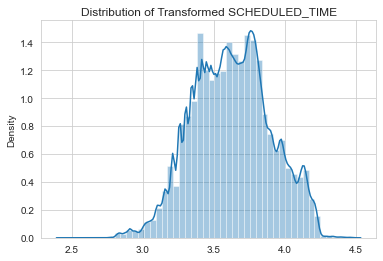

In [13]:
ax = sns.distplot(stats.boxcox(df['SCHEDULED_TIME'])[0])
ax.set_title('Distribution of Transformed SCHEDULED_TIME')

C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Transformed Distance')

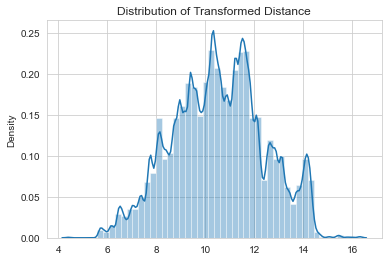

In [14]:
ax = sns.distplot(stats.boxcox(df['DISTANCE'])[0])
ax.set_title('Distribution of Transformed Distance')

In [15]:
t, p = stats.ttest_ind(stats.boxcox(df[df['DELAYED'] == 0].SCHEDULED_TIME)[0], 
                       stats.boxcox(df[df['DELAYED'] == 1].SCHEDULED_TIME)[0], 
                       equal_var=False)

print('SchedElapsedTime for Delayed vs. Non-Delayed Flights')
print('------------------------------------------------------')
print('t-statistic: %s' % t)
print('p-value: %s' % p)

SchedElapsedTime for Canceled vs. Non-canceled Flights
------------------------------------------------------
t-statistic: 329.5334718664326
p-value: 0.0


In [16]:
t, p = stats.ttest_ind(stats.boxcox(df[df['DELAYED'] == 0].DISTANCE)[0], 
                       stats.boxcox(df[df['DELAYED'] == 1].DISTANCE)[0], 
                       equal_var=False)

print('Distance for Delayed vs. Non-Delayed Flights')
print('------------------------------------------------------')
print('t-statistic: %s' % t)
print('p-value: %s' % p)

Distance for Canceled vs. Non-canceled Flights
------------------------------------------------------
t-statistic: -244.930961681554
p-value: 0.0


In [17]:
def print_chi2(df, col1, col2):
    obs = pd.crosstab(df[col1], df[col2])

    chi2, p, dof, expected = stats.chi2_contingency(obs)

    print('%s vs. %s' % (col1, col2))
    print('------------------------------')
    print('Chi-squared Test Statistic: %s' % chi2)
    print('P-value: %s' % p)
    print('Degrees of Freedom: %s\n' % dof)
    
print_chi2(df, 'DELAYED', 'AIRLINE')

DELAYED vs. AIRLINE
------------------------------
Chi-squared Test Statistic: 39943.27479722895
P-value: 0.0
Degrees of Freedom: 13



Text(0.5, 1.0, 'Number of Flights by Carrier and Delayed Status')

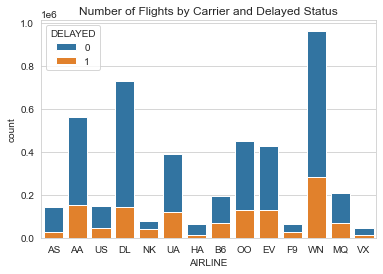

In [18]:
ax = sns.countplot(x='AIRLINE',data=df,hue='DELAYED',dodge=False)
ax.set_title('Number of Flights by Carrier and Delayed Status')

In [19]:
pd.crosstab(df['DELAYED'],df['AIRLINE']).apply(lambda r: r/r.sum(), axis=0)

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DELAYED,,,,,,,,,,,,,,
0,0.784412,0.835898,0.741384,0.837273,0.768404,0.699228,0.844729,0.752458,0.661627,0.777904,0.762067,0.772301,0.767522,0.773887
1,0.215588,0.164102,0.258616,0.162727,0.231596,0.300772,0.155271,0.247542,0.338373,0.222096,0.237933,0.227699,0.232478,0.226113


Text(0.5, 1.0, 'Comparison of Mean Arrival Delay by Airline')

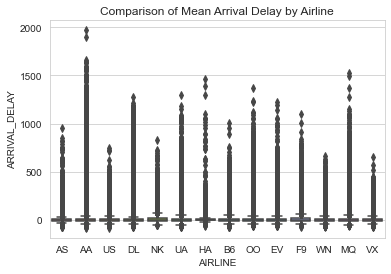

In [20]:
ax = sns.boxplot(x='AIRLINE',y='ARRIVAL_DELAY',data=df)
ax.set_title('Comparison of Mean Arrival Delay by Airline')

In [21]:

f, p = stats.f_oneway(df[df['AIRLINE'] == 'AA'].ARRIVAL_DELAY,
                      df[df['AIRLINE'] == 'VX'].ARRIVAL_DELAY,
                      df[df['AIRLINE'] == 'NK'].ARRIVAL_DELAY)

print('Arrival Delay for AA vs. VX vs. NK Flights')
print('------------------------------------------------------')
print('F-statistic: %s' % t)
print('p-value: %s' % p)

Arrival Delay for AA vs. DL vs. UA Flights
------------------------------------------------------
F-statistic: -244.930961681554
p-value: 0.0


Text(0.5, 1.0, 'Comparison of Mean Scheduled Time by Airline')

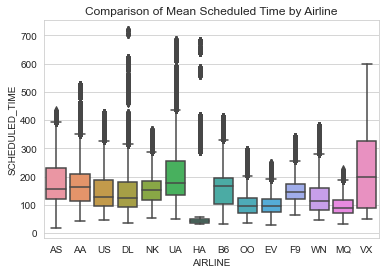

In [22]:
ax = sns.boxplot(x='AIRLINE',y='SCHEDULED_TIME',data=df)
ax.set_title('Comparison of Mean Scheduled Time by Airline')

In [23]:

f, p = stats.f_oneway(stats.boxcox(df[df['AIRLINE'] == 'AA'].SCHEDULED_TIME)[0],
                      stats.boxcox(df[df['AIRLINE'] == 'VX'].SCHEDULED_TIME)[0],
                      stats.boxcox(df[df['AIRLINE'] == 'NK'].SCHEDULED_TIME)[0])

print('SchedElapsedTime for AA vs. VX vs. NK Flights')
print('------------------------------------------------------')
print('F-statistic: %s' % t)
print('p-value: %s' % p)

SchedElapsedTime for AA vs. DL vs. UA Flights
------------------------------------------------------
F-statistic: -244.930961681554
p-value: 0.0


Text(0.5, 1.0, 'Comparison of Mean Arrival Delay by Canceled')

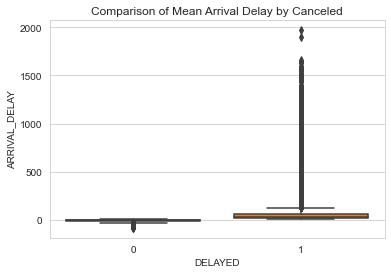

In [24]:
ax = sns.boxplot(x='DELAYED',y='ARRIVAL_DELAY',data=df)
ax.set_title('Comparison of Mean Arrival Delay by Canceled')